In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)

In [113]:
input_data = pd.read_csv("deepsolar_tract.csv", encoding="latin-1")

In [114]:
input_data.drop('Unnamed: 0', axis=1, inplace=True)

In [115]:
input_data[['tile_count', 'average_household_income', 'race_asian','race_black_africa','race_indian_alaska','race_white']].dropna()

,tile_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white
0,0.0,70352.789869,28,19,16,6420
1,25.0,61727.085202,188,205,23,7405
2,3.0,71496.886583,0,0,2,6939
3,0.0,86840.152755,171,69,26,5693
4,5.0,89135.315597,34,91,0,5017
...,...,...,...,...,...,...
72532,1.0,90163.611860,210,36,0,6078
72533,0.0,45124.153006,7,90,175,2384
72534,1.0,60878.458738,54,93,380,4064
72535,0.0,56817.996870,10,0,115,1669


In [67]:
state_solar_panel_data = input_data[['state','tile_count']].groupby('state')

In [69]:
avg_panel_area = input_data.groupby('state').mean()['total_panel_area']

In [70]:
state_solar_panel_data.count().join(avg_panel_area)

,tile_count,total_panel_area
state,,
al,1181,192.759931
ar,686,225.293538
az,1526,4538.558226
ca,8056,4558.411967
co,1249,1508.269378
ct,833,1553.147443
dc,179,863.135075
de,218,2283.592023
fl,4245,1455.049485


### highest solar panel count/area in each of Arizona's counties

In [9]:
arizona_df = input_data[input_data['state']=='az']
arizona_df.groupby('county').max()

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
county,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apache County,25.0,15.0,1868.243105,4001970502,64318.924174,574,1385,39,1596,1071,235,3976,50,1773,0.5185,1343,460,8,577

### The highest solar panels count in all of the Arizona state area

In [10]:
arizona_df[arizona_df['tile_count']==arizona_df['tile_count'].max()]

,tile_count,solar_system_count,total_panel_area,fips,average_household_income,county,education_bachelor,education_college,education_doctoral,education_high_school_graduate,education_less_than_high_school,education_master,education_population,education_professional_school,employed,gini_index,heating_fuel_coal_coke,heating_fuel_electricity,heating_fuel_fuel_oil_kerosene,heating_fuel_gas,heating_fuel_housing_unit_count,heating_fuel_none,heating_fuel_other,heating_fuel_solar,land_area,per_capita_income,population,population_density,poverty_family_below_poverty_level,poverty_family_count,race_asian,race_black_africa,race_indian_alaska,race_islander,race_other,race_two_more,race_white,state,total_area,unemployed,water_area,education_less_than_high_school_rate,education_high_school_graduate_rate,education_college_rate,education_bachelor_rate,education_master_rate,education_professional_school_rate,education_doctoral_rate,race_white_rate,race_black_africa_rate,race_indian_alaska_rate,race_asian_rate,race_islander_rate,race_other_rate,race_two_more_rate,employ_rate,poverty_family_below_poverty_level_rate,heating_fuel_gas_rate,heating_fuel_electricity_rate,heating_fuel_fuel_oil_kerosene_rate,heating_fuel_coal_coke_rate,heating_fuel_solar_rate,heating_fuel_other_rate,heating_fuel_none_rate,solar_panel_area_divided_by_area,solar_panel_area_per_capita,tile_count_residential,tile_count_nonresidential,solar_system_count_residential,solar_system_count_nonresidential,total_panel_area_residential,total_panel_area_nonresidential,median_household_income,electricity_price_residential,electricity_price_commercial,electricity_price_industrial,electricity_price_transportation,electricity_price_overall,electricity_consume_residential,electricity_consume_commercial,electricity_consume_industrial,electricity_consume_total,household_count,average_household_size,housing_unit_count,housing_unit_occupied_count,housing_unit_median_value,housing_unit_median_gross_rent,lat,lon,elevation,heating_design_temperature,cooling_design_temperature,earth_temperature_amplitude,frost_days,air_temperature,relative_humidity,daily_solar_radiation,atmospheric_pressure,wind_speed,earth_temperature,heating_degree_days,cooling_degree_days,age_18_24_rate,age_25_34_rate,age_more_than_85_rate,age_75_84_rate,age_35_44_rate,age_45_54_rate,age_65_74_rate,age_55_64_rate,age_10_14_rate,age_15_17_rate,age_5_9_rate,household_type_family_rate,dropout_16_19_inschool_rate,occupation_construction_rate,occupation_public_rate,occupation_information_rate,occupation_finance_rate,occupation_education_rate,occupation_administrative_rate,occupation_manufacturing_rate,occupation_wholesale_rate,occupation_retail_rate,occupation_transportation_rate,occupation_arts_rate,occupation_agriculture_rate,occupancy_vacant_rate,occupancy_owner_rate,mortgage_with_rate,transportation_home_rate,transportation_car_alone_rate,transportation_walk_rate,transportation_carpool_rate,transportation_motorcycle_rate,transportation_bicycle_rate,transportation_public_rate,travel_time_less_than_10_rate,travel_time_10_19_rate,travel_time_20_29_rate,travel_time_30_39_rate,travel_time_40_59_rate,travel_time_60_89_rate,health_insurance_public_rate,health_insurance_none_rate,age_median,travel_time_average,voting_2016_dem_percentage,voting_2016_gop_percentage,voting_2016_dem_win,voting_2012_dem_percentage,voting_2012_gop_percentage,voting_2012_dem_win,number_of_years_of_education,diversity,number_of_solar_system_per_household,incentive_count_residential,incentive_count_nonresidential,incentive_residential_state_level,incentive_nonresidential_state_level,net_metering,feedin_tariff,cooperate_tax,property_tax,sales_tax,rebate,avg_electricity_retail_rate
16497,1478.0,1079.0,37413.413085,4013040519,103585.137235,Maricopa County,1026,1214,90,500,50,717,3669,72,1663,0.3961,0,371,11,1508,1931,0,0,41,87.80375,43327.0,4701,53.53986,52,1519,109,26,27,0,10,180,4349,az,88.69394,99,0.890189,0.013628,0.136277,0.33088,0.27964,0.195421,0.019624,0.02

In [11]:
arizona_df[['county','tile_count','solar_system_count','total_panel_area','average_household_income']].groupby('county').mean()

,tile_count,solar_system_count,total_panel_area,average_household_income
county,,,,
Apache County,3.625000,2.625000,230.782946,40071.655004
Cochise County,55.593750,28.968750,4059.171220,55115.068425
Coconino County,32.250000,19.857143,1799.735168,65299.076613
Gila County,31.625000,20.062500,1802.430636,49296.817727
Graham County,13.444444,9.000000,653.738279,55646.604698
Greenlee County,2.666667,2.333333,194.558989,61203.879059
La Paz County,8.777778,5.777778,524.801003,47851.559876
Maricopa County,115.113537,75.620087,4713.162653,74002.696148
Mohave County,65.372093,43.511628,2532.359612,51029.046175


In [12]:
arizona_df[['county','tile_count','average_household_income']].groupby('county').mean().corr()

,tile_count,average_household_income
tile_count,1.000000,0.553329
average_household_income,0.553329,1.000000


### Correlation between average household income and number of solar panels

In [13]:
arizona_df[['tile_count','average_household_income']].corr()

,tile_count,average_household_income
tile_count,1.000000,0.248871
average_household_income,0.248871,1.000000


In [14]:
arizona_df[['county','tile_count','total_panel_area','race_asian','race_black_africa','race_indian_alaska','race_white']].groupby('county').sum()

,tile_count,total_panel_area,race_asian,race_black_africa,race_indian_alaska,race_white
county,,,,,,
Apache County,58.0,3.692527e+03,308,442,52154,16762
Cochise County,1779.0,1.298935e+05,2177,5023,1519,103744
Coconino County,903.0,5.039258e+04,2267,2137,36791,85870
Gila County,506.0,2.883889e+04,319,384,8029,42077
Graham County,121.0,5.883645e+03,241,782,5048,28820
Greenlee County,8.0,5.836770e+02,40,139,315,8063
La Paz County,79.0,4.723209e+03,168,40,2805,15033
Maricopa County,105444.0,4.317257e+06,152248,209789,76621,3197669
Mohave County,2811.0,1.088915e+05,2497,2292,4169,181085


### Correlation between race and solar panels

In [15]:
arizona_df[['county','tile_count','total_panel_area','race_asian','race_black_africa','race_indian_alaska','race_white']].corr()

,tile_count,total_panel_area,race_asian,race_black_africa,race_indian_alaska,race_white
tile_count,1.000000,0.777416,0.160224,0.114603,-0.119552,0.398070
total_panel_area,0.777416,1.000000,0.087440,0.078272,-0.075969,0.198721
race_asian,0.160224,0.087440,1.000000,0.188365,-0.096207,0.273371
race_black_africa,0.114603,0.078272,0.188365,1.000000,-0.065070,0.203498
race_indian_alaska,-0.119552,-0.075969,-0.096207,-0.065070,1.000000,-0.266942
race_white,0.398070,0.198721,0.273371,0.203498,-0.266942,1.000000


In [16]:
arizona_df[['county','tile_count_residential','tile_count_nonresidential','average_household_income']].groupby('county').mean()

,tile_count_residential,tile_count_nonresidential,average_household_income
county,,,
Apache County,1.687500,1.937500,40071.655004
Cochise County,26.937500,28.656250,55115.068425
Coconino County,18.285714,13.964286,65299.076613
Gila County,18.875000,12.750000,49296.817727
Graham County,6.888889,6.555556,55646.604698
Greenlee County,1.666667,1.000000,61203.879059
La Paz County,5.222222,3.555556,47851.559876
Maricopa County,82.009825,33.103712,74002.696148
Mohave County,43.116279,22.255814,51029.046175


In [17]:
X = arizona_df[['county','tile_count', 'average_household_income']].groupby('county').mean()

In [18]:
X

,tile_count,average_household_income
county,,
Apache County,3.625000,40071.655004
Cochise County,55.593750,55115.068425
Coconino County,32.250000,65299.076613
Gila County,31.625000,49296.817727
Graham County,13.444444,55646.604698
Greenlee County,2.666667,61203.879059
La Paz County,8.777778,47851.559876
Maricopa County,115.113537,74002.696148
Mohave County,65.372093,51029.046175


Text(0, 0.5, 'Tile Count')

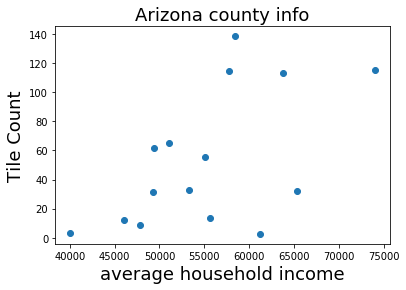

In [19]:
plt.scatter(X['average_household_income'], X['tile_count'], cmap="gist_rainbow")
plt.title('Arizona county info', fontsize=18)
plt.xlabel('average household income', fontsize=18)
plt.ylabel('Tile Count', fontsize=18)

## kmeans clustering on top 5 states (CA, AZ, FL, NY, NJ) of solar panel growth (average household income vs tile count)

In [116]:
ca_df = input_data[input_data['state']=='ca'][['state','county','tile_count','average_household_income', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()

In [117]:
az_df = input_data[input_data['state']=='az'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()

In [118]:
fl_df = input_data[input_data['state']=='fl'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()

In [119]:
ny_df = input_data[input_data['state']=='ny'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()

In [120]:
nj_df = input_data[input_data['state']=='nj'][['county','tile_count', 'average_household_income', 'state', 'race_asian','race_black_africa','race_indian_alaska','race_white']].groupby(['state','county'], as_index=False).mean()

### Table below shows the correlation between demographic factors and solar panel tile counts within the top 5 states in solar panel growth (California, Arizona, Florida, New York, New Jersey)

In [121]:
ca_df.append(az_df).append(fl_df).append(ny_df).append(nj_df).corr()

,tile_count,average_household_income,race_asian,race_black_africa,race_indian_alaska,race_white
tile_count,1.000000,0.283378,0.398340,-0.139983,-0.058465,0.221702
average_household_income,0.283378,1.000000,0.593963,-0.083597,-0.173119,0.005372
race_asian,0.398340,0.593963,1.000000,0.032959,-0.087265,-0.194450
race_black_africa,-0.139983,-0.083597,0.032959,1.000000,-0.151112,-0.103067
race_indian_alaska,-0.058465,-0.173119,-0.087265,-0.151112,1.000000,-0.237630
race_white,0.221702,0.005372,-0.194450,-0.103067,-0.237630,1.000000


In [122]:
ca_df["color"] = "dodgerblue"
az_df["color"] = "red"
fl_df["color"] = "orange"
ny_df["color"] = "blueviolet"
nj_df["color"] = "forestgreen"

In [123]:
top_five_states = ca_df[['state','county','tile_count','average_household_income','color']].append(az_df[['state','county','tile_count','average_household_income','color']]).append(fl_df[['state','county','tile_count','average_household_income','color']]).append(ny_df[['state','county','tile_count','average_household_income','color']]).append(nj_df[['state','county','tile_count','average_household_income','color']])

In [124]:
top_five_states

,state,county,tile_count,average_household_income,color
0,ca,Alameda County,106.155125,101764.701704,dodgerblue
1,ca,Alpine County,0.000000,62958.659218,dodgerblue
2,ca,Amador County,42.333333,72258.148307,dodgerblue
3,ca,Butte County,89.823529,59340.222385,dodgerblue
4,ca,Calaveras County,46.000000,75444.816219,dodgerblue
...,...,...,...,...,...
16,nj,Salem County,20.400000,74085.696960,forestgreen
17,nj,Somerset County,106.544118,133432.493983,forestgreen
18,nj,Sussex County,32.219512,102580.694201,forestgreen
19,nj,Union County,50.453704,95087.279154,forestgreen


In [125]:
label_encoder = preprocessing.LabelEncoder()

In [126]:
top_five_states['state'] = label_encoder.fit_transform(top_five_states['state'])

In [127]:
top_five_states

,state,county,tile_count,average_household_income,color
0,1,Alameda County,106.155125,101764.701704,dodgerblue
1,1,Alpine County,0.000000,62958.659218,dodgerblue
2,1,Amador County,42.333333,72258.148307,dodgerblue
3,1,Butte County,89.823529,59340.222385,dodgerblue
4,1,Calaveras County,46.000000,75444.816219,dodgerblue
...,...,...,...,...,...
16,3,Salem County,20.400000,74085.696960,forestgreen
17,3,Somerset County,106.544118,133432.493983,forestgreen
18,3,Sussex County,32.219512,102580.694201,forestgreen
19,3,Union County,50.453704,95087.279154,forestgreen


In [128]:
X = top_five_states[['tile_count','average_household_income']]

In [129]:
X = X.to_numpy()
X

array([[1.06155125e+02, 1.01764702e+05],
       [0.00000000e+00, 6.29586592e+04],
       [4.23333333e+01, 7.22581483e+04],
       [8.98235294e+01, 5.93402224e+04],
       [4.60000000e+01, 7.54448162e+04],
       [9.26000000e+01, 6.42253665e+04],
       [2.45014423e+02, 1.08654144e+05],
       [3.50000000e+00, 5.23363356e+04],
       [1.43372093e+02, 9.13372596e+04],
       [2.12115578e+02, 6.25318816e+04],
       [1.51833333e+02, 6.35026309e+04],
       [3.02258065e+01, 5.63239930e+04],
       [2.11258065e+02, 5.55888699e+04],
       [2.41666667e+01, 6.67741439e+04],
       [2.62397351e+02, 6.40004806e+04],
       [3.09148148e+02, 6.19008663e+04],
       [5.85333333e+01, 4.78801966e+04],
       [1.55555556e+00, 6.11366815e+04],
       [6.10963342e+01, 7.95241975e+04],
       [1.80869565e+02, 5.94309470e+04],
       [1.04946429e+02, 1.47071451e+05],
       [3.50000000e+00, 6.72175495e+04],
       [2.28571429e+01, 6.03559255e+04],
       [1.62816327e+02, 5.72499223e+04],
       [4.250000

In [130]:
actual_labels = np.array(top_five_states['state'])
actual_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

In [131]:
kmeans = KMeans(n_clusters=5, random_state=21)

In [132]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [133]:
centers = kmeans.cluster_centers_
print(centers)

[[3.01840665e+01 5.07856466e+04]
 [9.90578330e+01 9.85781751e+04]
 [4.49295275e+01 6.23381899e+04]
 [6.10219705e+01 1.31259702e+05]
 [6.20122345e+01 7.73975300e+04]]


In [134]:
new_labels = kmeans.labels_
new_labels

array([1, 2, 4, 2, 4, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 4, 2, 3, 2,
       2, 2, 0, 4, 4, 1, 4, 1, 1, 4, 4, 4, 4, 2, 4, 3, 2, 4, 3, 1, 3, 1,
       2, 2, 0, 4, 4, 2, 2, 0, 0, 0, 2, 1, 4, 0, 0, 0, 2, 0, 0, 2, 0, 4,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 4, 0, 2, 0, 2, 1, 0, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 2, 2, 4, 2, 0,
       0, 0, 2, 0, 4, 2, 1, 4, 4, 0, 2, 2, 4, 2, 2, 0, 0, 4, 4, 4, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 0, 3, 3, 2, 2, 2, 4, 4,
       2, 2, 2, 3, 4, 4, 1, 1, 4, 2, 2, 2, 2, 2, 2, 1, 2, 4, 4, 4, 4, 2,
       2, 3, 2, 2, 4, 3, 1, 4, 4, 2, 4, 1, 4, 3, 1, 1, 1, 3, 4, 4, 4, 3,
       1, 1, 4], dtype=int32)

Text(0, 0.5, 'Average Tile count')

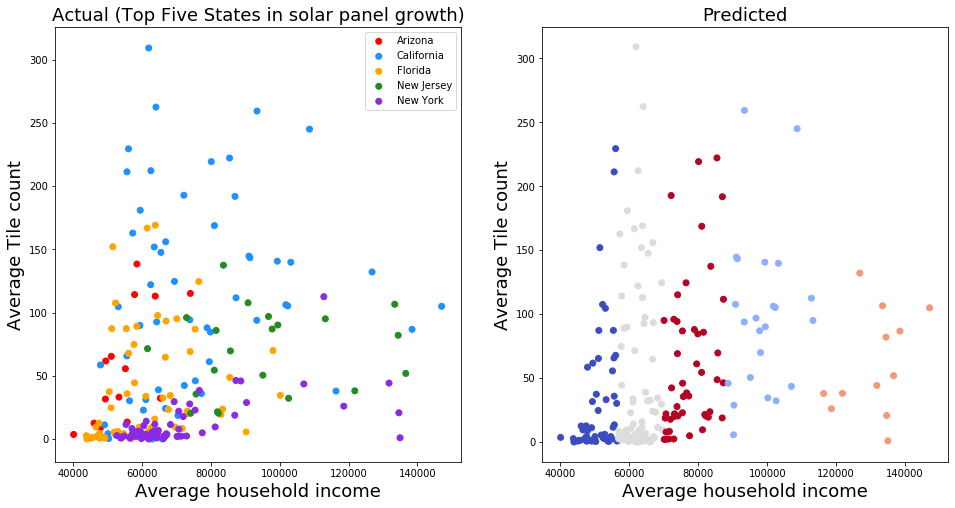

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(top_five_states['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "New Jersey"
    elif (cls == 4):
        label = "New York"
    else:
        label = "Louisiana"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average household income", fontsize=18)
    axes[0].set_ylabel("Average Tile count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted", fontsize=18)
axes[1].set_xlabel("Average household income", fontsize=18)
axes[1].set_ylabel("Average Tile count", fontsize=18)

## k-means on top 5 states of solar panel growth (race vs tile count)

In [137]:
ca["color"] = "dodgerblue"
az["color"] = "red"
fl["color"] = "orange"
ny["color"] = "blueviolet"
nj["color"] = "forestgreen"

In [138]:
race_white = ca[['state','tile_count','race_white','color']].append(az[['state','tile_count','race_white','color']]).append(fl[['state','tile_count','race_white','color']]).append(ny[['state','tile_count','race_white','color']]).append(nj[['state','tile_count','race_white','color']])

### preprocessing

In [139]:
race_white['state'] = label_encoder.fit_transform(race_white['state'])

In [140]:
X = race_white[['tile_count','race_white']]
X = X.to_numpy()

In [141]:
actual_labels = np.array(race_white['state'])

In [142]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [143]:
new_labels = kmeans.labels_
new_labels

array([3, 3, 4, 1, 1, 1, 4, 0, 1, 0, 1, 4, 1, 0, 1, 1, 4, 0, 0, 2, 1, 0,
       4, 4, 0, 1, 4, 0, 2, 4, 4, 0, 4, 0, 1, 4, 1, 0, 0, 1, 0, 4, 0, 1,
       4, 0, 0, 0, 1, 1, 4, 2, 0, 2, 1, 1, 4, 1, 3, 4, 4, 0, 4, 0, 3, 4,
       1, 3, 4, 1, 1, 2, 0, 4, 2, 4, 2, 1, 4, 1, 1, 2, 2, 1, 1, 4, 4, 4,
       0, 1, 3, 0, 4, 0, 4, 0, 1, 1, 4, 4, 0, 1, 1, 4, 0, 4, 2, 4, 0, 4,
       4, 0, 1, 1, 1, 1, 0, 2, 4, 0, 1, 2, 4, 4, 4, 4, 4, 2, 1, 1, 2, 2,
       2, 2, 4, 1, 1, 2, 1, 0, 4, 4, 3, 4, 4, 1, 4, 4, 1, 1, 0, 1, 4, 0,
       4, 0, 4, 4, 1, 0, 3, 4, 1, 3, 1, 1, 1, 0, 0, 4, 4, 4, 0, 0, 1, 4,
       4, 1, 4, 2, 3, 4, 4, 4, 1, 0, 1, 4, 4, 1, 4, 1, 0, 2, 1, 4, 4, 4,
       1, 0, 4, 2, 0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 4, 0, 4, 1, 1, 4, 0, 4,
       4, 0, 1], dtype=int32)

### As shown in the graph below, on average as the amount of white people increase so does solar panels 

Text(0, 0.5, 'Average Tile count')

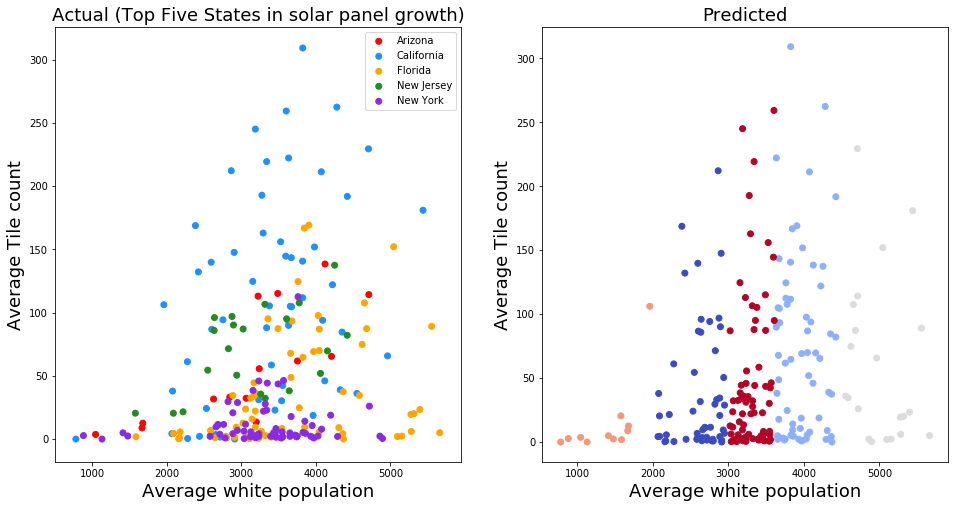

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
for (i, cls) in enumerate(set(actual_labels)):
    x = [p for (j,p) in enumerate(X[:,1]) if actual_labels[j]==cls]
    y = [p for (j,p) in enumerate(X[:,0]) if actual_labels[j]==cls]
    color = [c for (j,c) in enumerate(race_white['color']) if actual_labels[j]==cls]
    if (cls == 0):
        label = "Arizona"
    elif (cls == 1):
        label = "California"
    elif (cls == 2):
        label = "Florida"
    elif (cls == 3):
        label = "New Jersey"
    elif (cls == 4):
        label = "New York"
    else:
        label = "Louisiana"
    axes[0].scatter(x, y, c=color, label=label)
    axes[0].set_title("Actual (Top Five States in solar panel growth)", fontsize=18)
    axes[0].set_xlabel("Average white population", fontsize=18)
    axes[0].set_ylabel("Average Tile count", fontsize=18)
axes[0].legend()
axes[1].scatter(X[:,1], X[:,0], c=new_labels, cmap="coolwarm")
axes[1].set_title("Predicted", fontsize=18)
axes[1].set_xlabel("Average white population", fontsize=18)
axes[1].set_ylabel("Average Tile count", fontsize=18)

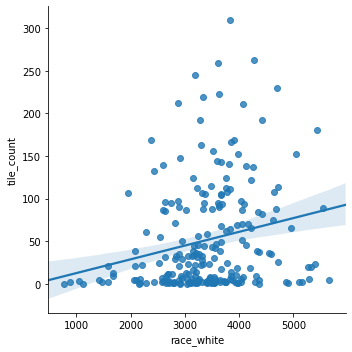

In [145]:
sns.lmplot('race_white', 'tile_count', data=race_white)